## Travel Insurance Claims

### Buisness problem : A third-party travel insurance servicing company that is based in Singapore, they want                                          to predict which customer claim should accept or decline according to their records                                              on insurance list. 

#### The attributes:

1. Target: Claim Status (Claim.Status)
2. Name of agency (Agency)
3. Type of travel insurance agencies (Agency.Type)
4. Distribution channel of travel insurance agencies (Distribution.Channel)
5. Name of the travel insurance products (Product.Name)
6. Duration of travel (Duration)
7. Destination of travel (Destination)
8. Amount of sales of travel insurance policies (Net.Sales)
9. Commission received for travel insurance agency (Commission)
10. Gender of insured (Gender)
11. Age of insured (Age)

#### Import libraies for our business problem

In [1]:
# Importing necessary packages for predictions

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for plots to apppear inside the notebook
%matplotlib inline 

# for displaying all variables
pd.set_option('display.max_columns', None)

# data preprocessing techniques 
from sklearn import preprocessing  

import scipy.stats as ss

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#### Read the dataset

In [2]:
# Loading the dataset
df = pd.read_csv("G:\\Travel Insurance\\travel_insurance_claim.csv")
print("Shape of dataset : ", df.shape)

Shape of dataset :  (63326, 11)


#### EDA (Exploratory Data Analysis)

In [3]:
# EDA
# The goal here is to find out more about the data and become a subject matter export on the dataset we're working with.

df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,81,No
1,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,71,No
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65,AUSTRALIA,-49.5,29.70,NaN,32,No
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60,AUSTRALIA,-39.6,23.76,NaN,32,No
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79,ITALY,-19.8,11.88,NaN,41,No
5,JZI,Airlines,Online,Value Plan,66,UNITED STATES,-121.0,42.35,F,44,No
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,47,UNITED STATES,-39.6,23.76,NaN,32,No
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,63,AUSTRALIA,-108.9,65.34,NaN,29,No
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,57,THAILAND,-19.8,11.88,NaN,44,No
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,186,AUSTRALIA,-99.0,59.40,NaN,37,No


In [4]:
# generating count stats of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")  

No. of duplicated entries:  8042
      Agency Agency Type Distribution Channel Product Name  Duration  \
119      ART    Airlines               Online   24 Protect         3   
8112     ART    Airlines               Online   24 Protect         3   
55353    ART    Airlines               Online   24 Protect         4   
55354    ART    Airlines               Online   24 Protect         4   
10940    ART    Airlines               Online   24 Protect         7   

      Destination  Net Sales  Commision (in value) Gender  Age Claim  
119      MALAYSIA       4.99                  1.75      M   48    No  
8112     MALAYSIA       4.99                  1.75      M   48    No  
55353    MALAYSIA      16.93                  5.93      M   48    No  
55354    MALAYSIA      16.93                  5.93      M   48    No  
10940    THAILAND      19.88                  6.96      M   48    No  


In [5]:
# there are 8042 No. of duplicate entries found in our dataset

# so let's drop duplicate entries from our dataset
df = df.drop_duplicates(keep='first')

In [6]:
# now let's again check generating count stats of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found") # now there is no any duplicate entries in our dataset

No duplicated entries found


In [7]:
print("Shape of final dataset : ", df.shape)
df.head()

Shape of final dataset :  (55284, 11)


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,81,No
1,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,71,No
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65,AUSTRALIA,-49.5,29.70,NaN,32,No
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60,AUSTRALIA,-39.6,23.76,NaN,32,No
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79,ITALY,-19.8,11.88,NaN,41,No


In [8]:
df.info() # checking information about variables in dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55284 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                55284 non-null  object 
 1   Agency Type           55284 non-null  object 
 2   Distribution Channel  55284 non-null  object 
 3   Product Name          55284 non-null  object 
 4   Duration              55284 non-null  int64  
 5   Destination           55284 non-null  object 
 6   Net Sales             55284 non-null  float64
 7   Commision (in value)  55284 non-null  float64
 8   Gender                16959 non-null  object 
 9   Age                   55284 non-null  int64  
 10  Claim                 55284 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 5.1+ MB


In [9]:
# Are there any missing values?
# let's check
df.isnull().sum() #only "Gender" variables has most missing/NA values

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  38325
Age                         0
Claim                       0
dtype: int64

In [10]:
df.isnull().mean() # check null values in %

Agency                  0.000000
Agency Type             0.000000
Distribution Channel    0.000000
Product Name            0.000000
Duration                0.000000
Destination             0.000000
Net Sales               0.000000
Commision (in value)    0.000000
Gender                  0.693239
Age                     0.000000
Claim                   0.000000
dtype: float64

In [11]:
# lets check "Gender" variable
df.Gender.value_counts()

M    8558
F    8401
Name: Gender, dtype: int64

In [12]:
# filling NA values

df = df.fillna(df['Gender'].value_counts().index[0])

In [13]:
df.isnull().mean() # now there is no any missing values in "Gender"

Agency                  0.0
Agency Type             0.0
Distribution Channel    0.0
Product Name            0.0
Duration                0.0
Destination             0.0
Net Sales               0.0
Commision (in value)    0.0
Gender                  0.0
Age                     0.0
Claim                   0.0
dtype: float64

In [14]:
df.Gender.value_counts()

M    46883
F     8401
Name: Gender, dtype: int64

In [15]:
df.describe(include=['O']) # statastical summary of categorical variables

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender,Claim
count,55284,55284,55284,55284,55284,55284,55284
unique,16,2,2,26,149,2,2
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,M,No
freq,28956,39098,54232,15308,11539,46883,54363


In [16]:
df.describe() # statastical summary of numerical variables 

,Duration,Net Sales,Commision (in value),Age
count,55284.000000,55284.000000,55284.000000,55284.000000
mean,52.715035,42.788716,10.680707,39.977932
std,106.413615,50.448570,20.676708,13.509125
min,-2.000000,-389.000000,0.000000,0.000000
25%,11.000000,19.167500,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.500000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


Wait! "Duration" means time right? that means time cannot be negative but lookup there the min value in "Duration" variable
is -2. So let's figure out this variable

In [17]:
# let's check how many negative values are there?
df_duration = df['Duration']<0
df_duration.sum()  # 5 values are negative

5

In [18]:
# now let's fill this negative values with mean of "Duration"
df.Duration.mean()

52.71503509152738

In [19]:
df.loc[df['Duration'] < 0, 'Duration'] = 52.715

In [20]:
df.Duration.describe()

count    55284.000000
mean        52.719911
std        106.412379
min          0.000000
25%         11.000000
50%         25.000000
75%         57.000000
max       4881.000000
Name: Duration, dtype: float64

In [21]:
# let's make new numerical columns frame

df_numerical = df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55284 entries, 0 to 63325
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              55284 non-null  float64
 1   Net Sales             55284 non-null  float64
 2   Commision (in value)  55284 non-null  float64
 3   Age                   55284 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 2.1 MB


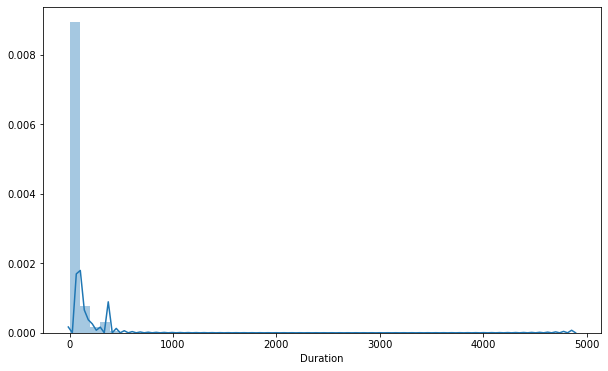

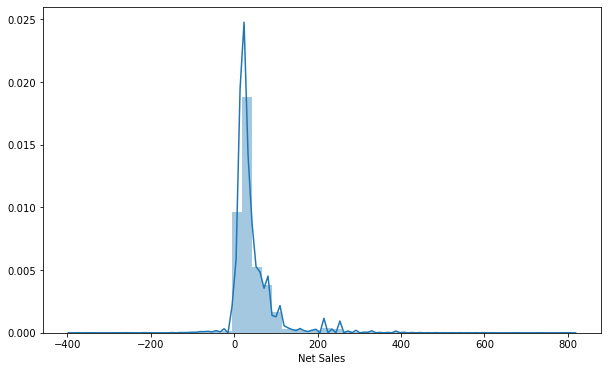

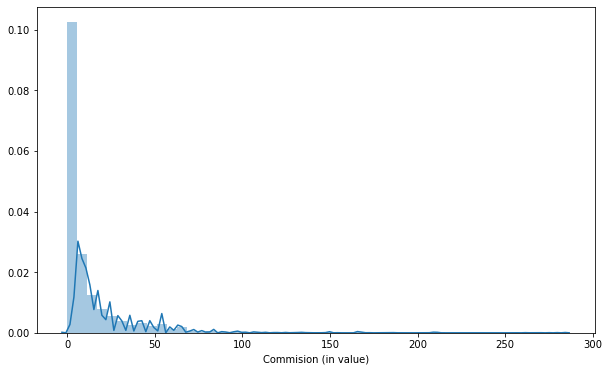

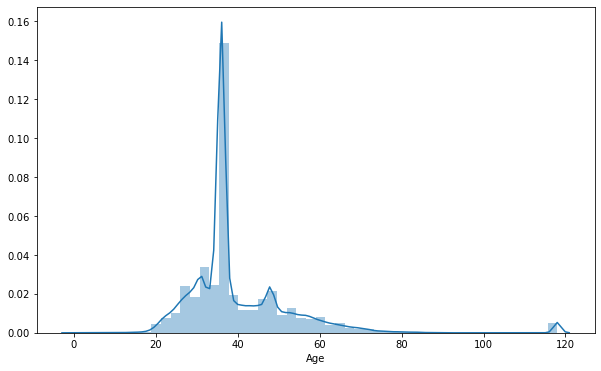

In [22]:
for i, col in enumerate(df_numerical.columns):
    plt.figure(figsize=(10,6))
    sns.distplot(df_numerical[col])

From the graph we can conclude:

* Duration: Data in this column is highly right skewed.

* Net Sales and Commison: These both column seems to related but the graph plot shows disparency as low net sales shows high commison which is not pratically possible.

* Age: Age is random so its distribution can be random.

we have checked that some columns have low Net Sales but High Commison but thats not possible

In [23]:
# Lets see how many such columns we have here

df_sales_commision = df['Net Sales'] < df['Commision (in value)']
df_sales_commision.sum()

1955

In [24]:
# We gonna make all comission value 0 where net sales is 0.

df.loc[df['Net Sales'] == 0.0, 'Commision (in value)'] = 0

In [25]:
print(df['Agency Type'].value_counts())
print("="*50)
print(df['Distribution Channel'].value_counts())

Travel Agency    39098
Airlines         16186
Name: Agency Type, dtype: int64
Online     54232
Offline     1052
Name: Distribution Channel, dtype: int64


Lets see which features are important for the prediction using Chi Square Test

In [26]:
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, df):
        self.df = df
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = ss.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [27]:
X = df.drop(['Claim'], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, 'Claim')

Agency is IMPORTANT for Prediction
Agency Type is IMPORTANT for Prediction
Distribution Channel is NOT an important predictor. (Discard Distribution Channel from model)
Product Name is IMPORTANT for Prediction
Duration is IMPORTANT for Prediction
Destination is IMPORTANT for Prediction
Net Sales is IMPORTANT for Prediction
Commision (in value) is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Age is IMPORTANT for Prediction


#### There is no impact on dependent variable for "Agency Type" and "Distribution Channel", so we can drop this variable for giving the best prediction result for ML model.

In [28]:
# So let's drop it
df = df.drop(['Agency Type','Distribution Channel'],axis=1)

In [29]:
# let's lookout our dataset
df.head()

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CBH,Comprehensive Plan,186.0,MALAYSIA,-29.0,9.57,F,81,No
1,CBH,Comprehensive Plan,186.0,MALAYSIA,-29.0,9.57,F,71,No
2,CWT,Rental Vehicle Excess Insurance,65.0,AUSTRALIA,-49.5,29.70,M,32,No
3,CWT,Rental Vehicle Excess Insurance,60.0,AUSTRALIA,-39.6,23.76,M,32,No
4,CWT,Rental Vehicle Excess Insurance,79.0,ITALY,-19.8,11.88,M,41,No


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55284 entries, 0 to 63325
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                55284 non-null  object 
 1   Product Name          55284 non-null  object 
 2   Duration              55284 non-null  float64
 3   Destination           55284 non-null  object 
 4   Net Sales             55284 non-null  float64
 5   Commision (in value)  55284 non-null  float64
 6   Gender                55284 non-null  object 
 7   Age                   55284 non-null  int64  
 8   Claim                 55284 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.2+ MB


In [31]:
pd.crosstab(df.Claim,df.Gender)

Gender,F,M
Claim,,
No,8056,46307
Yes,345,576


Text(0, 0.5, 'Amount')

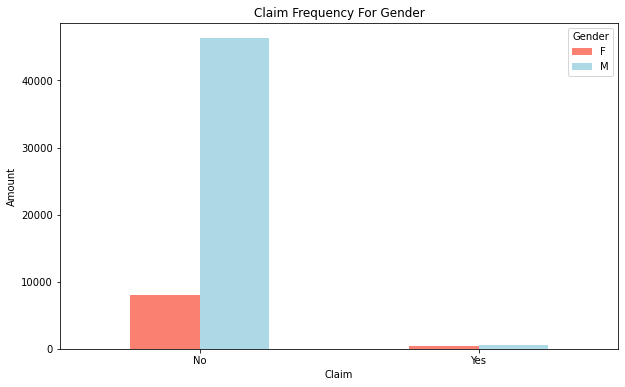

In [32]:
# Now let's visualze
pd.crosstab(df.Claim, df.Gender).plot(kind = "bar", figsize = (10,6), color = ["salmon","lightblue"],rot=0)

plt.title("Claim Frequency For Gender")
plt.ylabel("Amount")
#plt.xticks()

Text(0, 0.5, 'Amount')

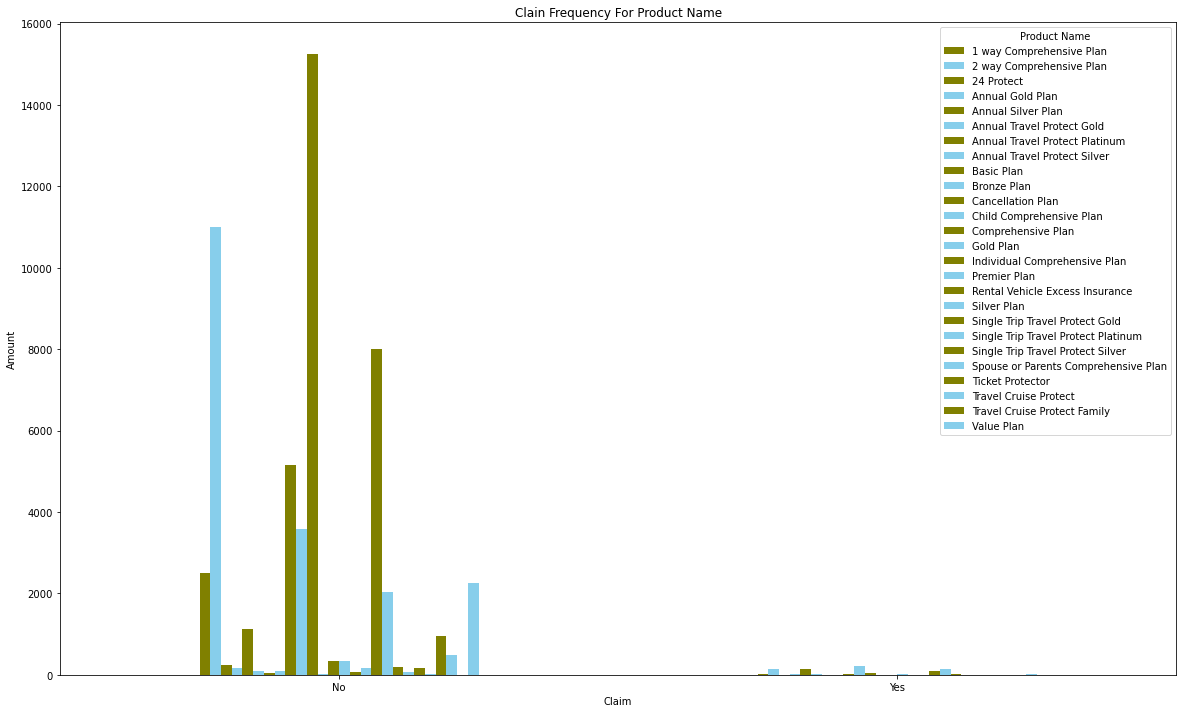

In [33]:
# Now let's visualze
pd.crosstab(df.Claim, df['Product Name']).plot(kind = "bar", figsize = (20,12), color = ["olive","skyblue"],rot=0)

plt.title("Clain Frequency For Product Name")
plt.ylabel("Amount")
#plt.xticks()

In [34]:
# convert categorical into numericals
category_col =['Agency', 'Product Name', 'Destination', 'Gender','Claim'] 
labelEncoder = preprocessing.LabelEncoder()

mapping_dict ={} 
for col in category_col: 
    df[col] = labelEncoder.fit_transform(df[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
    
print(mapping_dict)

{'Agency': {'ADM': 0, 'ART': 1, 'C2B': 2, 'CBH': 3, 'CCR': 4, 'CSR': 5, 'CWT': 6, 'EPX': 7, 'JWT': 8, 'JZI': 9, 'KML': 10, 'LWC': 11, 'RAB': 12, 'SSI': 13, 'TST': 14, 'TTW': 15}, 'Product Name': {'1 way Comprehensive Plan': 0, '2 way Comprehensive Plan': 1, '24 Protect': 2, 'Annual Gold Plan': 3, 'Annual Silver Plan': 4, 'Annual Travel Protect Gold': 5, 'Annual Travel Protect Platinum': 6, 'Annual Travel Protect Silver': 7, 'Basic Plan': 8, 'Bronze Plan': 9, 'Cancellation Plan': 10, 'Child Comprehensive Plan': 11, 'Comprehensive Plan': 12, 'Gold Plan': 13, 'Individual Comprehensive Plan': 14, 'Premier Plan': 15, 'Rental Vehicle Excess Insurance': 16, 'Silver Plan': 17, 'Single Trip Travel Protect Gold': 18, 'Single Trip Travel Protect Platinum': 19, 'Single Trip Travel Protect Silver': 20, 'Spouse or Parents Comprehensive Plan': 21, 'Ticket Protector': 22, 'Travel Cruise Protect': 23, 'Travel Cruise Protect Family': 24, 'Value Plan': 25}, 'Destination': {'ALBANIA': 0, 'ANGOLA': 1, 'ARG

In [35]:
# let's check data types in dataset
df.dtypes

Agency                    int32
Product Name              int32
Duration                float64
Destination               int32
Net Sales               float64
Commision (in value)    float64
Gender                    int32
Age                       int64
Claim                     int32
dtype: object

In [36]:
# Now we finally lookout our full final dataset
df.head()

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,3,12,186.0,79,-29.0,9.57,0,81,0
1,3,12,186.0,79,-29.0,9.57,0,71,0
2,6,16,65.0,4,-49.5,29.70,1,32,0
3,6,16,60.0,4,-39.6,23.76,1,32,0
4,6,16,79.0,61,-19.8,11.88,1,41,0


In [37]:
df.describe()

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
count,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000
mean,6.616942,9.484335,52.719911,85.423432,42.788716,10.029162,0.848039,39.977932,0.016659
std,2.455166,6.612259,106.412379,42.581118,50.448570,20.260817,0.358986,13.509125,0.127993
min,0.000000,0.000000,0.000000,0.000000,-389.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,11.000000,56.000000,19.167500,0.000000,1.000000,34.000000,0.000000
50%,7.000000,10.000000,25.000000,91.000000,29.000000,0.000000,1.000000,36.000000,0.000000
75%,7.000000,16.000000,57.000000,118.000000,50.500000,11.550000,1.000000,45.000000,0.000000
max,15.000000,25.000000,4881.000000,148.000000,810.000000,283.500000,1.000000,118.000000,1.000000


In [38]:
# Make correlation matrix
df.corr()

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
Agency,1.000000,0.134380,-0.061773,-0.212004,-0.228062,-0.148240,0.199425,0.114926,-0.122736
Product Name,0.134380,1.000000,-0.054539,-0.062146,-0.087513,0.265879,-0.144614,0.228897,-0.002481
Duration,-0.061773,-0.054539,1.000000,0.072391,0.407612,0.329463,-0.089411,0.008194,0.069479
Destination,-0.212004,-0.062146,0.072391,1.000000,0.086062,0.006127,-0.136267,-0.026867,0.048819
Net Sales,-0.228062,-0.087513,0.407612,0.086062,1.000000,0.683577,-0.137940,0.036790,0.131479
Commision (in value),-0.148240,0.265879,0.329463,0.006127,0.683577,1.000000,-0.176270,0.117937,0.100703
Gender,0.199425,-0.144614,-0.089411,-0.136267,-0.137940,-0.176270,1.000000,-0.079319,-0.080722
Age,0.114926,0.228897,0.008194,-0.026867,0.036790,0.117937,-0.079319,1.000000,-0.012728
Claim,-0.122736,-0.002481,0.069479,0.048819,0.131479,0.100703,-0.080722,-0.012728,1.000000


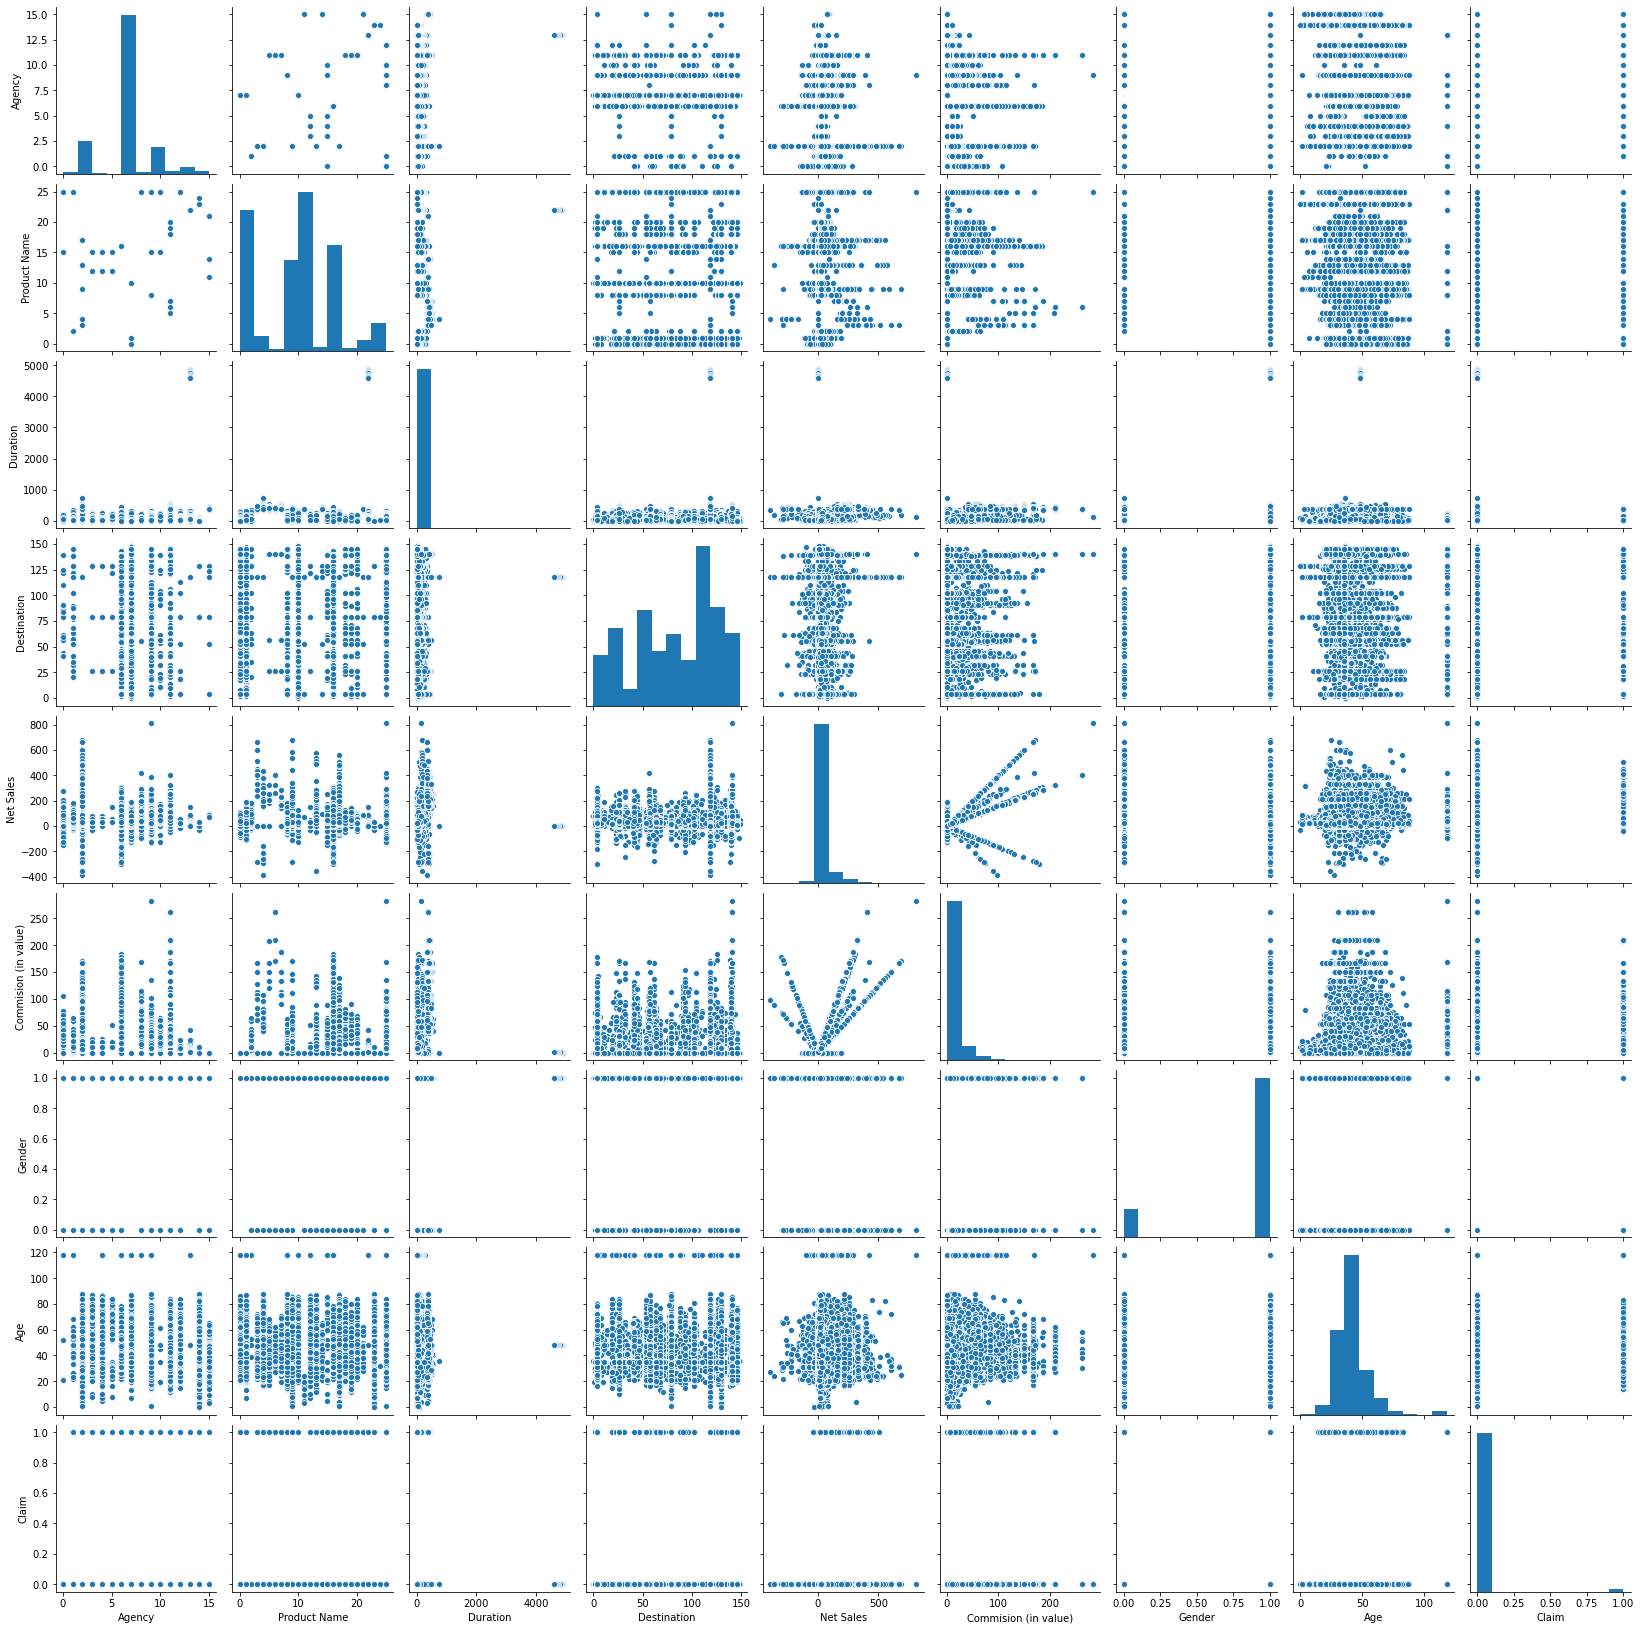

In [39]:
# let's plot pairplot for dataset
sns.pairplot(df)

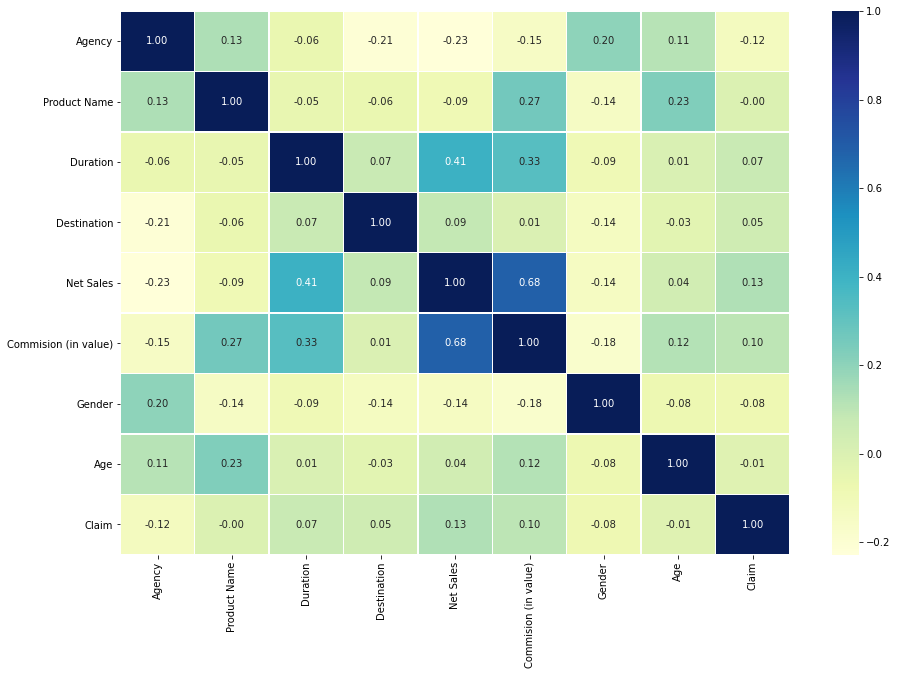

In [40]:
# Let's visualize our corrrelation matrix for better understanding
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

Since, our dependent variable(i.e. "Claim") is imbalnaced , so our next target is make it balaneced so that it will help for best acuuracy prediction for our business problem

In [41]:
# Let's make our dependent variable balanced by using SMOTE(Synthetic Minority Oversampling Technique) techique
# make independent and dependent features
# define a random state 
state = np.random.RandomState(42)

X = df.drop('Claim',axis=1)
y = df.Claim

In [42]:
X.head()

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3,12,186.0,79,-29.0,9.57,0,81
1,3,12,186.0,79,-29.0,9.57,0,71
2,6,16,65.0,4,-49.5,29.70,1,32
3,6,16,60.0,4,-39.6,23.76,1,32
4,6,16,79.0,61,-19.8,11.88,1,41


In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int32

In [44]:
X_outliers = state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))

In [45]:
# print the shapes of X & Y
print(X.shape)
print(y.shape)

(55284, 8)
(55284,)


In [46]:
df.isnull().values.any()

False

C:\Users\MOHD.RASHED\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support 'Y' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\MOHD.RASHED\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


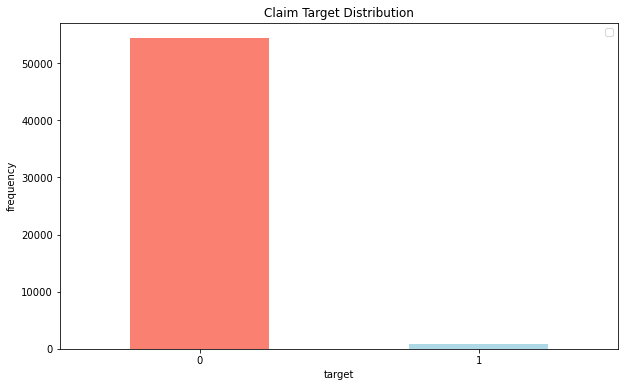

In [47]:
count_targets = pd.value_counts(df['Claim'],sort = True)
count_targets.plot(kind='bar',rot=0,color=["salmon","lightblue"],figsize = (10,6))
plt.title("Claim Target Distribution")
plt.xlabel("target")
plt.ylabel("frequency")
plt.legend("Yes","No")

In [48]:
## get the FRAUD & NORMAL data set
fraud = df[df['Claim']==1]
genuin = df[df['Claim']==0]
print(fraud.shape,genuin.shape)

(921, 9) (54363, 9)


In [49]:
### SMOTE to handle imbalanced data set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_res,y_res = smote.fit_sample(X,y)
print(X_res.shape,y_res.shape)

from collections import Counter
print('Original dataset shape{}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(y_res)))

(108726, 8) (108726,)
Original dataset shapeCounter({0: 54363, 1: 921})
Resampled dataset shapeCounter({0: 54363, 1: 54363})


In [50]:
# splitting data into training and tesing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [51]:
X_test

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
81945,2,9,42.561148,118,27.672659,6.919280,0,28
23001,7,10,38.000000,21,12.000000,0.000000,1,36
66180,2,17,5.306902,118,29.163363,7.292474,0,39
88276,7,1,39.157666,26,40.319680,0.000000,1,36
100195,2,8,11.796920,118,40.145057,9.709886,1,31
...,...,...,...,...,...,...,...,...
87529,11,5,368.000000,140,322.475421,209.608290,0,37
15814,7,10,57.000000,103,29.000000,0.000000,1,36
106842,8,5,52.780921,60,33.976787,9.561843,1,29
41278,7,0,13.000000,56,23.000000,0.000000,1,36


In [52]:
y_test

81945     1
23001     0
66180     1
88276     1
100195    1
         ..
87529     1
15814     0
106842    1
41278     0
45718     0
Name: Claim, Length: 32618, dtype: int32

### Model Building

In [53]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.9683607505124298
Test Accuracy Balanced Data 0.9603286528910417
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     16435
           1       0.95      0.97      0.96     16183

    accuracy                           0.96     32618
   macro avg       0.96      0.96      0.96     32618
weighted avg       0.96      0.96      0.96     32618



In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
cm

array([[15588,   847],
       [  447, 15736]], dtype=int64)

Area under the ROC curve : 0.960421


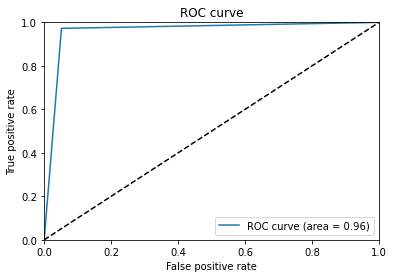

In [55]:
## Let's plot ROC(Receiver Operating Characteristics) curve :
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

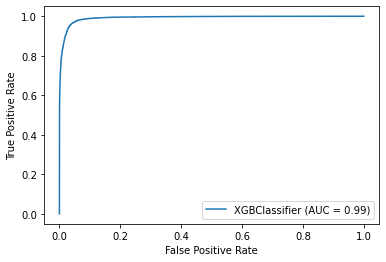

In [56]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)

In [57]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(random_state=42,max_iter=200)
model2.fit(X_train,y_train)
pred_test = model2.predict(X_test)
pred_train = model2.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.7507095180532927
Test Accuracy Balanced Data 0.7490955913912564
              precision    recall  f1-score   support

           0       0.72      0.83      0.77     16435
           1       0.80      0.66      0.72     16183

    accuracy                           0.75     32618
   macro avg       0.76      0.75      0.75     32618
weighted avg       0.76      0.75      0.75     32618



In [58]:
cm2 = confusion_matrix(y_test, pred_test)
cm2

array([[13699,  2736],
       [ 5448, 10735]], dtype=int64)

Area under the ROC curve : 0.748438


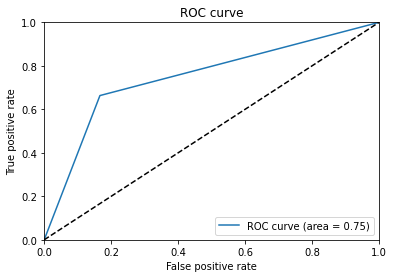

In [59]:
## Let's plot ROC(Receiver Operating Characteristics) curve :
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

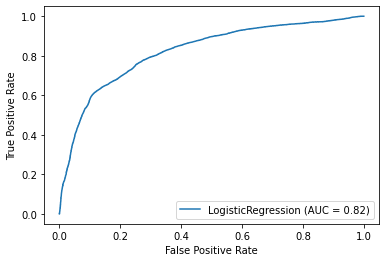

In [60]:
plot_roc_curve(model2, X_test, y_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(criterion='gini',random_state=42)
model3.fit(X_train,y_train)
pred_test = model3.predict(X_test)
pred_train = model3.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.998725495348715
Test Accuracy Balanced Data 0.9705377398982157
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     16435
           1       0.96      0.98      0.97     16183

    accuracy                           0.97     32618
   macro avg       0.97      0.97      0.97     32618
weighted avg       0.97      0.97      0.97     32618



In [62]:
cm3 = confusion_matrix(y_test, pred_test)
cm3

array([[15831,   604],
       [  357, 15826]], dtype=int64)

Area under the ROC curve : 0.970594


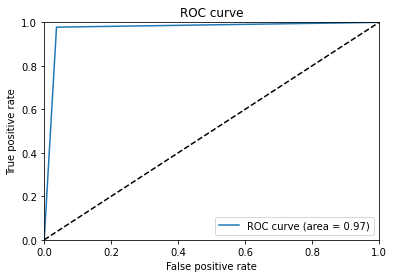

In [63]:
## Let's plot ROC(Receiver Operating Characteristics) curve :
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

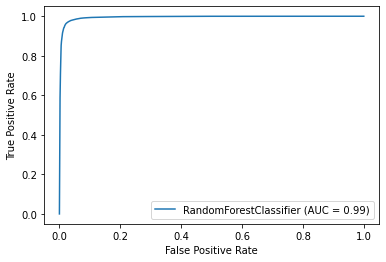

In [64]:
plot_roc_curve(model3, X_test, y_test)

In [65]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(random_state=42,splitter='best',min_samples_split=4,min_samples_leaf=2)
model4.fit(X_train,y_train)
pred_test = model4.predict(X_test)
pred_train = model4.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.9874651810584958
Test Accuracy Balanced Data 0.9524189098044025
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     16435
           1       0.96      0.94      0.95     16183

    accuracy                           0.95     32618
   macro avg       0.95      0.95      0.95     32618
weighted avg       0.95      0.95      0.95     32618



In [66]:
cm4 = confusion_matrix(y_test, pred_test)
cm4

array([[15786,   649],
       [  903, 15280]], dtype=int64)

Area under the ROC curve : 0.952356


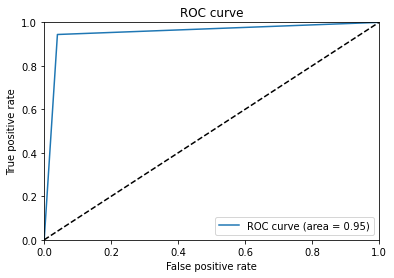

In [67]:
## Let's plot ROC(Receiver Operating Characteristics) curve :
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

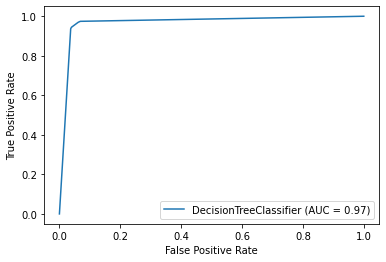

In [68]:
plot_roc_curve(model4, X_test, y_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier as KNC
model5 = KNC(n_neighbors= 5,n_jobs=200)
model5.fit(X_train,y_train)
pred_test = model5.predict(X_test)
pred_train = model5.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.9496504966626373
Test Accuracy Balanced Data 0.9281378380035563
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     16435
           1       0.88      0.98      0.93     16183

    accuracy                           0.93     32618
   macro avg       0.93      0.93      0.93     32618
weighted avg       0.93      0.93      0.93     32618



In [70]:
cm5 = confusion_matrix(y_test, pred_test)
cm5

array([[14360,  2075],
       [  269, 15914]], dtype=int64)

Area under the ROC curve : 0.928561


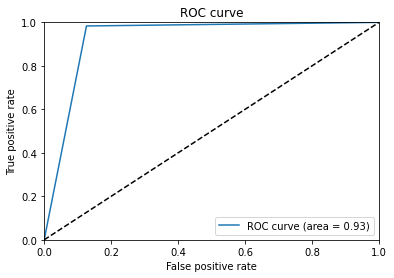

In [71]:
## Let's plot ROC(Receiver Operating Characteristics) curve :
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [72]:
model6= KNC(n_neighbors=10,n_jobs=100)
model6.fit(X_train,y_train)
pred_test = model6.predict(X_test)
pred_train = model6.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.9300204971882062
Test Accuracy Balanced Data 0.9150162486970385
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     16435
           1       0.87      0.98      0.92     16183

    accuracy                           0.92     32618
   macro avg       0.92      0.92      0.91     32618
weighted avg       0.92      0.92      0.91     32618



In [73]:
cm6 = confusion_matrix(y_test, pred_test)
cm6

array([[14047,  2388],
       [  384, 15799]], dtype=int64)

Area under the ROC curve : 0.915486


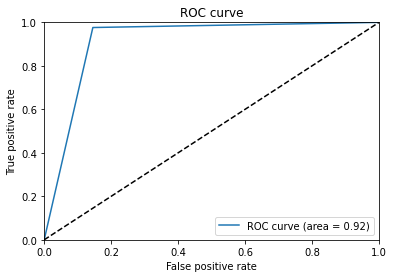

In [74]:
## Let's plot ROC(Receiver Operating Characteristics) curve :
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [75]:
from sklearn.svm import SVC
model7 = SVC(kernel = "rbf",random_state=42)
model7.fit(X_train,y_train)
pred_test = model7.predict(X_test)
pred_train = model7.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.749789772428654
Test Accuracy Balanced Data 0.7496167760132442
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     16435
           1       0.77      0.70      0.74     16183

    accuracy                           0.75     32618
   macro avg       0.75      0.75      0.75     32618
weighted avg       0.75      0.75      0.75     32618



In [76]:
cm7 = confusion_matrix(y_test, pred_test)
cm7

array([[13043,  3392],
       [ 4775, 11408]], dtype=int64)

Area under the ROC curve : 0.749274


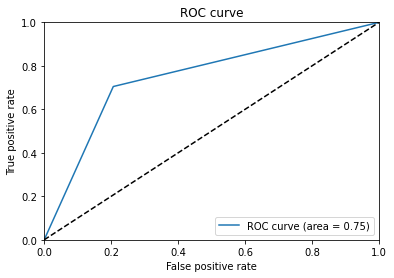

In [77]:
## Let's plot ROC(Receiver Operating Characteristics) curve :
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [78]:
# Saving model to disk
import pickle

pickle.dump(model3, open('warranty_claim_model.pkl','wb'))